In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import KFold, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
raw_data = pd.read_csv('Zoo.csv')
raw_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
type=[]
for i in raw_data['type']:
  if i==1:
    type.append('Mammal')
  elif i==2:
    type.append('Bird')
  elif i==3:
    type.append('Reptile')
  elif i==4:
    type.append('Fish')
  elif i==5:
    type.append('Amphibian')
  elif i==6:
    type.append('Bug')
  elif i==7:          
    type.append('Invertebrate')

print(type)    

['Mammal', 'Mammal', 'Fish', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Fish', 'Fish', 'Mammal', 'Mammal', 'Bird', 'Fish', 'Invertebrate', 'Invertebrate', 'Invertebrate', 'Bird', 'Mammal', 'Fish', 'Mammal', 'Bird', 'Bird', 'Mammal', 'Bird', 'Bug', 'Amphibian', 'Amphibian', 'Mammal', 'Mammal', 'Mammal', 'Bug', 'Mammal', 'Mammal', 'Bird', 'Fish', 'Mammal', 'Mammal', 'Bird', 'Fish', 'Bug', 'Bug', 'Bird', 'Bug', 'Bird', 'Mammal', 'Mammal', 'Invertebrate', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Bug', 'Amphibian', 'Invertebrate', 'Mammal', 'Mammal', 'Bird', 'Bird', 'Bird', 'Bird', 'Fish', 'Fish', 'Reptile', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Bird', 'Invertebrate', 'Fish', 'Mammal', 'Mammal', 'Reptile', 'Invertebrate', 'Bird', 'Bird', 'Reptile', 'Invertebrate', 'Fish', 'Bird', 'Mammal', 'Invertebrate', 'Fish', 'Bird', 'Bug', 'Amphibian', 'Reptile', 'Reptile', 'Fish', 'Mammal', 'Mammal', 'Bird', 'Mammal', 'Bug', 'Mammal', 'Invertebrate', 'Bird']


In [5]:
raw_data['animal_number'] = raw_data['type'].copy()
raw_data['animal_type'] = type

In [6]:
raw_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,animal_number,animal_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1,Mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,6,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1,Mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,7,Invertebrate


#Data Exploration

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal name    101 non-null    object
 1   hair           101 non-null    int64 
 2   feathers       101 non-null    int64 
 3   eggs           101 non-null    int64 
 4   milk           101 non-null    int64 
 5   airborne       101 non-null    int64 
 6   aquatic        101 non-null    int64 
 7   predator       101 non-null    int64 
 8   toothed        101 non-null    int64 
 9   backbone       101 non-null    int64 
 10  breathes       101 non-null    int64 
 11  venomous       101 non-null    int64 
 12  fins           101 non-null    int64 
 13  legs           101 non-null    int64 
 14  tail           101 non-null    int64 
 15  domestic       101 non-null    int64 
 16  catsize        101 non-null    int64 
 17  type           101 non-null    int64 
 18  animal_number  101 non-null   

In [8]:
raw_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,animal_number
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000,7.000000


In [9]:
raw_data.isna().sum()

animal name      0
hair             0
feathers         0
eggs             0
milk             0
airborne         0
aquatic          0
predator         0
toothed          0
backbone         0
breathes         0
venomous         0
fins             0
legs             0
tail             0
domestic         0
catsize          0
type             0
animal_number    0
animal_type      0
dtype: int64

In [10]:
raw_data[raw_data.duplicated()].sum()

animal name      0.0
hair             0.0
feathers         0.0
eggs             0.0
milk             0.0
airborne         0.0
aquatic          0.0
predator         0.0
toothed          0.0
backbone         0.0
breathes         0.0
venomous         0.0
fins             0.0
legs             0.0
tail             0.0
domestic         0.0
catsize          0.0
type             0.0
animal_number    0.0
animal_type      0.0
dtype: float64

In [11]:
list(raw_data)

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type',
 'animal_number',
 'animal_type']

#Data Visualization

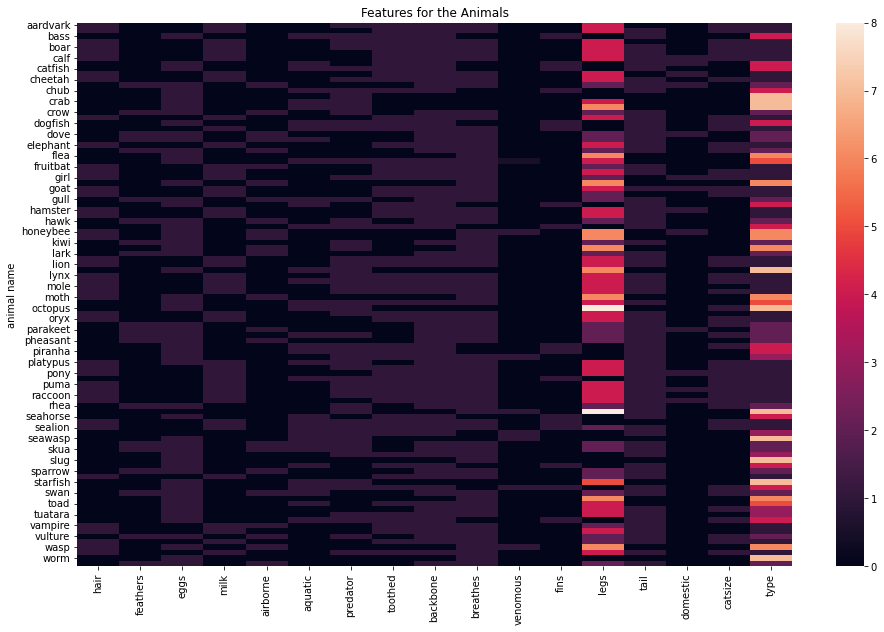

In [12]:
data = raw_data.drop(['animal_type','animal_number'], axis=1)
data = data.groupby(by='animal name').mean()
plt.figure(figsize = (16,10))
sns.heatmap(data)
plt.title("Features for the Animals")
plt.show()

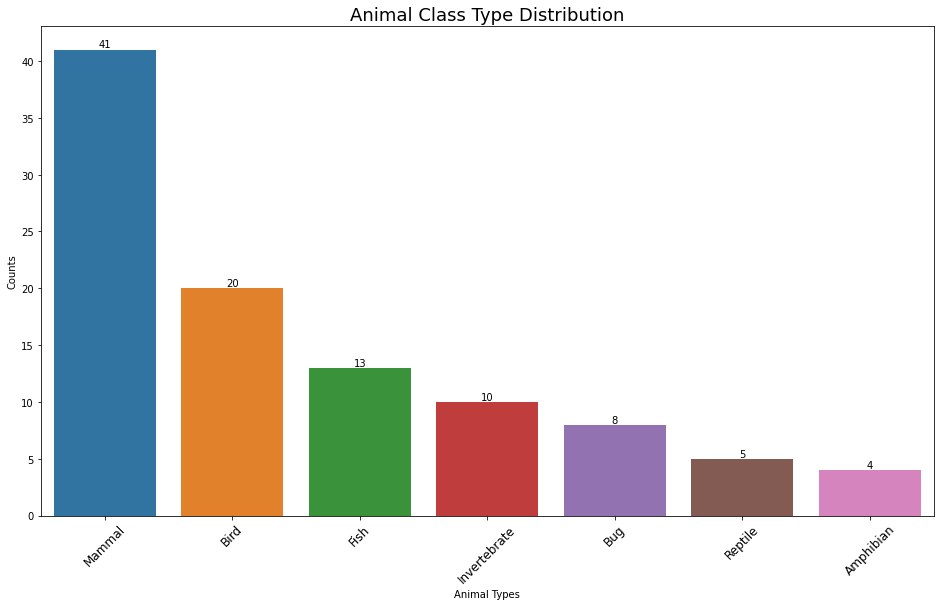

In [13]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = raw_data['animal_type'].value_counts().index.tolist(), y = raw_data['animal_type'].value_counts().tolist())
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Animal Class Type Distribution",  fontsize = 18)
plt.xlabel('Animal Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

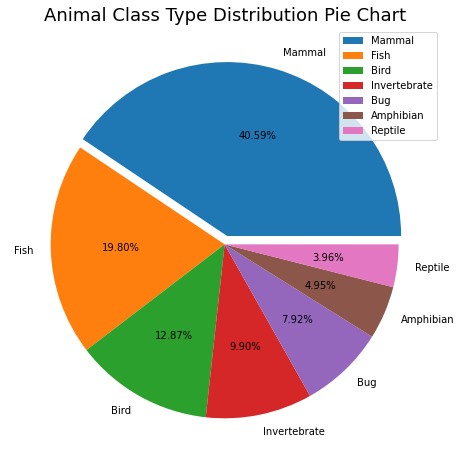

In [14]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['animal_type'].value_counts(),
       labels=raw_data.animal_type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%')
plt.legend()
plt.title("Animal Class Type Distribution Pie Chart", fontsize = 18)
plt.show()

#Data PreProcessing

In [15]:
zoo = raw_data.copy()
zoo.drop(['animal_type','animal name','animal_number'], axis=1, inplace=True)
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [16]:
x = zoo.drop('type',axis=1)
y = zoo[['type']]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (70, 16)
Shape of X_test:  (31, 16)
Shape of y_train:  (70, 1)
Shape of y_test:  (31, 1)


#Choosing the best value of K using Grid search

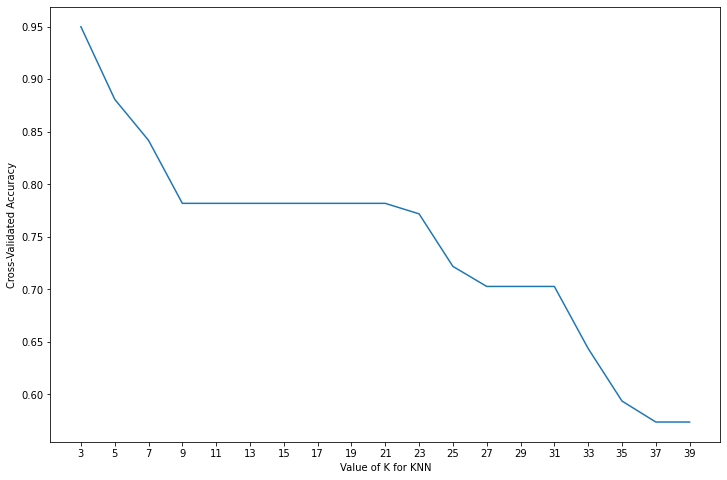

Best K value for {'n_neighbors': 3}
Best score is 0.95


In [19]:
from sklearn.model_selection import cross_val_score, GridSearchCV
# choose k between 1 to 40
k_range = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv =10)
grid.fit(x, y)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

print('Best K value for',grid.best_params_)
print('Best score is',grid.best_score_)

In [20]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,0.950000
1,0.880909
2,0.841818
6,0.781818
8,0.781818
7,0.781818
9,0.781818
5,0.781818
4,0.781818
3,0.781818


K-value vs Accuracy

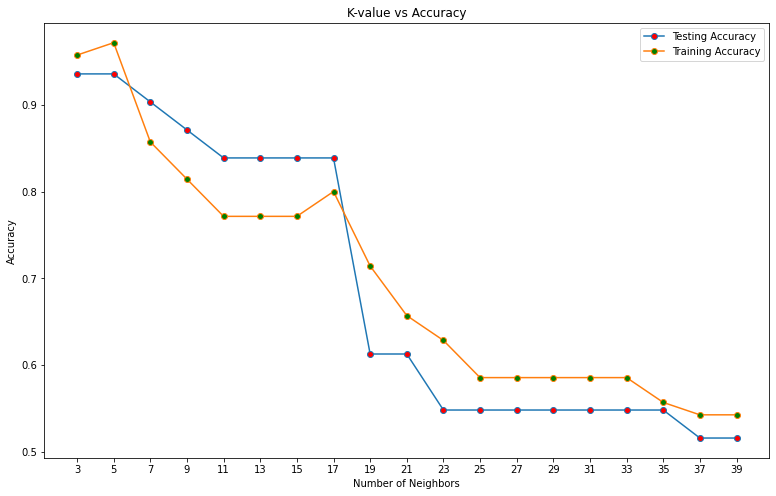

In [21]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
    
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy', marker='o', markerfacecolor='r')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy', marker='o', markerfacecolor='g')
plt.legend()
plt.title('K-value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()

K-value vs Error

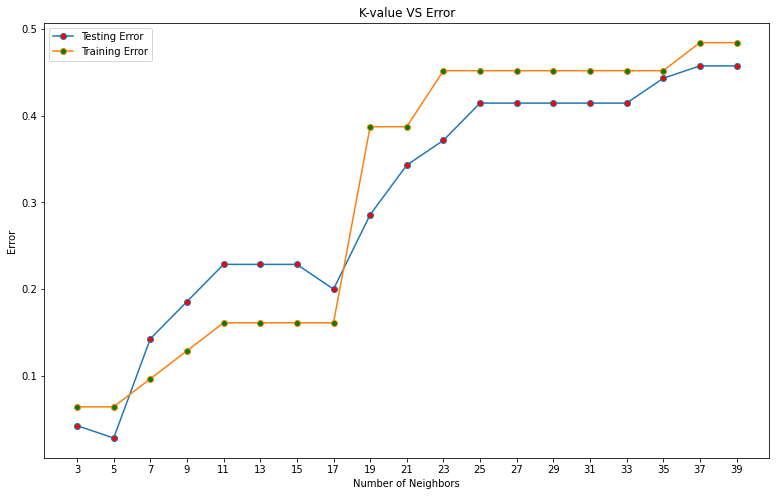

In [22]:
error1= []
error2= []
k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(70,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(31,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, error1, label = 'Testing Error', marker='o', markerfacecolor='r')
plt.plot(k_range, error2, label = 'Training Error', marker='o', markerfacecolor='g')
plt.legend()
plt.title('K-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

#KNN: K-Nearest Neighbours

**1) For K=3**

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('For K=3: \n')
print(confusion_matrix(y_test,pred))

For K=3: 

[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



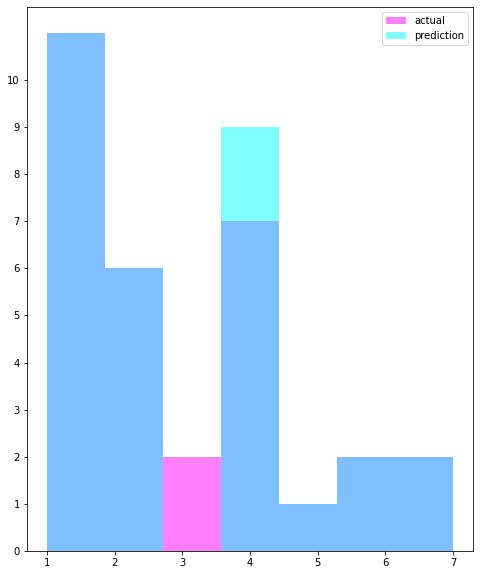

In [25]:
plt.figure(figsize = (8,10))
plt.hist(y_test, color = 'magenta', alpha = 0.5, label = 'actual', bins=7)
plt.hist(pred, color = 'aqua', alpha = 0.5, label = 'prediction', bins=7)
plt.yticks(np.arange(0,11))
plt.legend(loc = 'best')
plt.show()

**1) For K=5**

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('For K=5: \n')
print(confusion_matrix(y_test,pred))

For K=5: 

[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



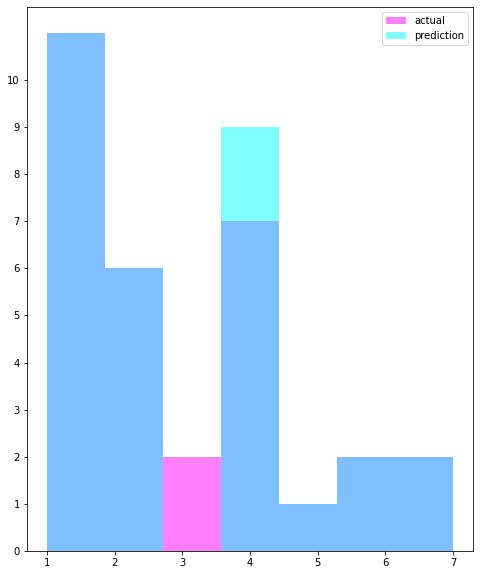

In [28]:
plt.figure(figsize = (8,10))
plt.hist(y_test, color = 'magenta', alpha = 0.5, label = 'actual', bins=7)
plt.hist(pred, color = 'aqua', alpha = 0.5, label = 'prediction', bins=7)
plt.yticks(np.arange(0,11))
plt.legend(loc = 'best')
plt.show()

# For K=5 removing Legs feature

In [29]:
data = raw_data.copy()
f = list(data.columns.values)
f.remove('legs')
f.remove('animal name')
f.remove('animal_number')
f.remove('animal_type')
x2 = data[f]
y2 = data['animal_type']

# Split X and Y into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(x2,y2,random_state = 0)

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X2_train,y2_train)
pred = knn.predict(X2_test)

print('For K=5 removing Legs feature:\n')
print(confusion_matrix(y2_test,pred))

For K=5 removing Legs feature:

[[ 1  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  1]]


In [31]:
print(classification_report(y2_test,pred))

              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         1
        Bird       1.00      1.00      1.00         5
         Bug       1.00      1.00      1.00         2
        Fish       1.00      1.00      1.00         5
Invertebrate       1.00      1.00      1.00         2
      Mammal       1.00      1.00      1.00        10
     Reptile       1.00      1.00      1.00         1

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



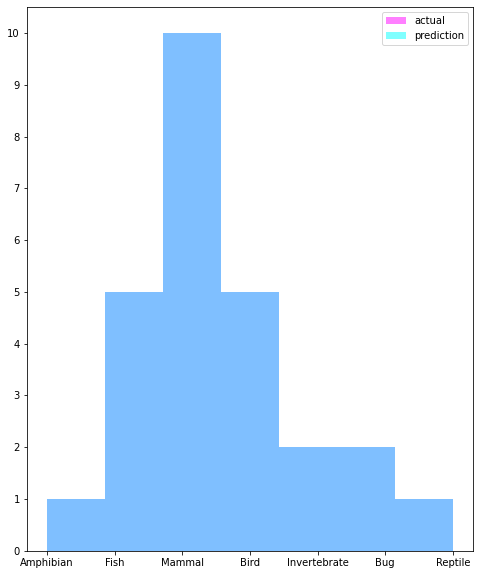

In [32]:
plt.figure(figsize = (8,10))
plt.hist(y2_test, color = 'magenta', alpha = 0.5, label = 'actual', bins=7)
plt.hist(pred, color = 'aqua', alpha = 0.5, label = 'prediction', bins=7)
plt.yticks(np.arange(0,11))
plt.legend(loc = 'best')
plt.show()

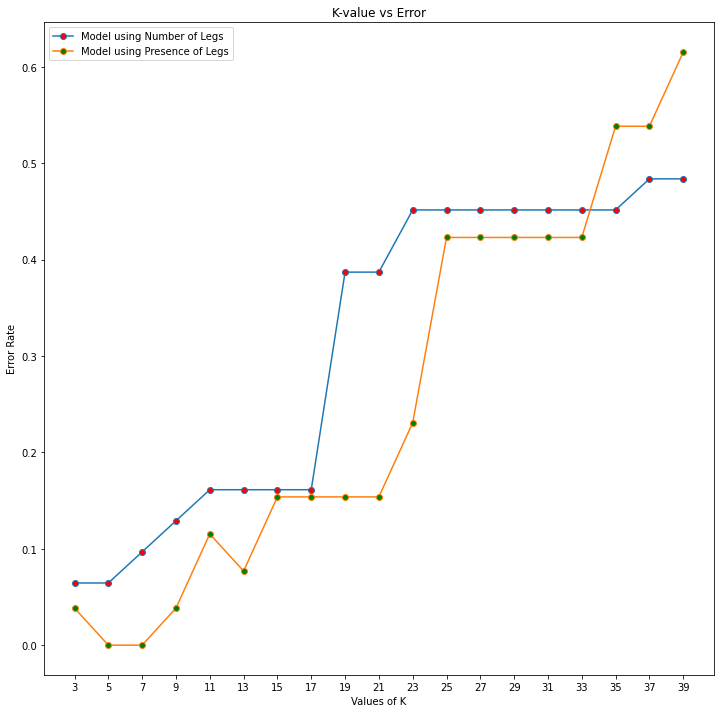

In [33]:
k_list = np.arange(3, 40, 2)
mean_scores2 = []
accuracy_list2 = []
error_rate2 = []

for i in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train,y2_train)
    pred_i = knn2.predict(X2_test)
    score = cross_val_score(knn2,X2_train, y2_train,cv=10)
    mean_scores2.append(np.mean(score))
    error_rate2.append(np.mean(pred_i != y2_test))

plt.figure(figsize = (12,12))    
plt.plot(k_list,error2, marker = 'o', markerfacecolor = 'r', label='Model using Number of Legs')
plt.plot(k_list,error_rate2, marker = 'o', markerfacecolor = 'g', label='Model using Presence of Legs')
plt.title('K-value vs Error')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.legend()
plt.show()

#Conclusion

**Hence, we found K value is best at K=3 and for K=5 model is same.**

**Replacing the feature legs has improved the accuracy of KNN models at every value where n >3.**